# Используемый датасет - Airplane_Crashes_and_Fatalities_Since_1908.csv. В нем собрана информация о крушениях самолетов. 

In [27]:
import pandas as pd
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


# Удалим неинформативные столбцы, строки дубликаты, строки, в которых все значения пустые

In [10]:
useless_col = ['Flight #', 'cn/In', 'Registration', 'Ground', 'Summary', 'Route']
df.drop(useless_col, axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(how='all', inplace=True)

# Для удобства поработаем над названием стоблцов

In [28]:
df.rename(columns=str.lower, inplace=True)
df.rename(columns={'type':'plane model'}, inplace=True)

# Анализ

## ТОП-5 локаций по количеству крушений

In [20]:
df['location'].value_counts().head(5)

Moscow, Russia            15
Sao Paulo, Brazil         15
Rio de Janeiro, Brazil    14
Manila, Philippines       13
Bogota, Colombia          13
Name: location, dtype: int64

## ТОП-5 операторов по количеству крушений

In [21]:
df['operator'].value_counts().head(5)

Aeroflot                     179
Military - U.S. Air Force    176
Air France                    70
Deutsche Lufthansa            65
United Air Lines              44
Name: operator, dtype: int64

## ТОП-5 моделей самолетов по количеству крушений

In [22]:
df['plane model'].value_counts().head(5)

Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Name: plane model, dtype: int64

## Рассмотрим зависимость числа крушений от даты

In [12]:
df[['month', 'day', 'year']] = df['date'].str.split('/', n=3, expand=True)
df.sort_values(['year', 'month', 'day']).reset_index(drop=True, inplace=True)

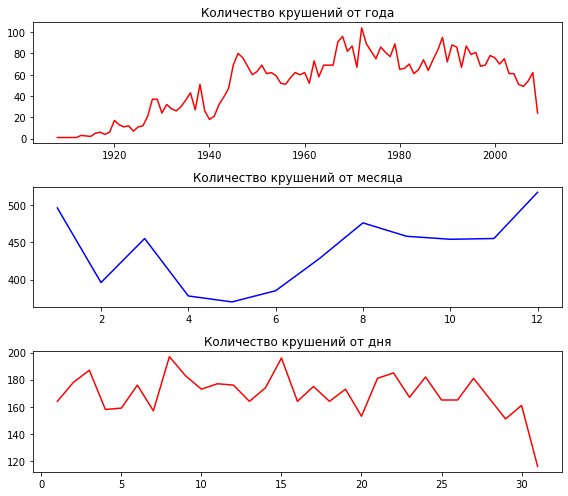

In [18]:
df[['month', 'day', 'year']] = df['date'].str.split('/', n=3, expand=True)
df.sort_values(['year', 'month', 'day']).reset_index(drop=True, inplace=True)

import numpy as np
def x(column_name):
    return np.array(df[column_name].value_counts().sort_index().index).astype(int)
def y(column_name):
    return np.array(df[column_name].value_counts().sort_index().values).astype(int)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(8, 7))
axes[0].plot(x('year'), y('year'), color='red')
axes[0].set_title('Количество крушений от года')
axes[1].plot(x('month'), y('month'), color='blue')
axes[1].set_title('Количество крушений от месяца')
axes[2].plot(x('day'), y('day'), color='red')
axes[2].set_title('Количество крушений от дня')
plt.tight_layout() 
plt.show()

## Выводы: 
## Меньше все крушений было в 1920-1940 года, скорее всего потому, что тогда летало меньше самолетов. Затем количество крушений начинает увеличиваться. Ближе к 2000 идет на спад, скорее всего благодаря развитию индустрии.
## Больше всего крушений приходится на зиму. Также их много летом, скорее всего в это время увеличивается количество рейсов. Меньше всего крушений в апреле-июне. 
## По дням месяца количество крушений распределено относительно равномерно

## Посчитаем средний процент выживающих при крушении

In [34]:
df['survival rate'] = df.apply(lambda row:
    round(1 - row['fatalities'] / row['aboard'], 2) if row['fatalities'] != None and row['aboard'] != (None or 0) else None, axis=1)
print('средний процент выживающих при крушении: ', round(df['survival rate'].mean(), 2)*100)

средний процент выживающих при крушении:  17.0


In [31]:
df

,date,time,location,operator,flight #,route,plane model,registration,cn/in,aboard,fatalities,ground,summary,survival rate
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",0.50
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.00
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,0.30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",0.12
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,0.00
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,0.00
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,0.00
